# Import Our Library

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as mc
import os

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # setting seaborn default for plots
%matplotlib inline
import tensorflow as tf


# Load the file data

In [3]:
df = pd.read_excel('feature.xlsx',header=1)
trainLabel=pd.read_csv('train_label.csv')

In [4]:
df.head(5)

,date,136088194,136088202,136088394,136088802,136089546,136110468,136216674,136222202,136222210,...,136225010.4,136675426.4,136675626.4,136676578.4,136676650.4,136676666.4,136676682.4,136676698.4,136676714.4,136676754.4
0,2015-05-03,0,0,0,0,1,504,0,2,8,...,9056.261199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-05-04,0,0,0,0,0,2250,0,1,2,...,25402.087770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-05-05,0,0,0,0,0,1700,0,2,5,...,13609.724304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-05-06,0,0,0,0,0,2261,0,10,7,...,26122.640408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-07,0,0,0,0,0,2950,0,5,8,...,25499.201836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index([       'date',     136088194,     136088202,     136088394,
           136088802,     136089546,     136110468,     136216674,
           136222202,     136222210,
       ...
       '136225010.4', '136675426.4', '136675626.4', '136676578.4',
       '136676650.4', '136676666.4', '136676682.4', '136676698.4',
       '136676714.4', '136676754.4'],
      dtype='object', length=131)

In [6]:
trainLabel.head()

,date,label
0,3/5/2015,NaN
1,4/5/2015,0.0
2,5/5/2015,0.0
3,6/5/2015,0.0
4,7/5/2015,0.0


In [7]:
trainLabel.count()

date     514
label    513
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Columns: 131 entries, date to 136676754.4
dtypes: datetime64[ns](1), float64(103), int64(26), object(1)
memory usage: 1013.7+ KB


In [9]:
df.describe()

,136088194,136088202,136088394,136088802,136089546,136110468,136216674,136222202,136222210,136222234,...,136225010.4,136675426.4,136675626.4,136676578.4,136676650.4,136676666.4,136676682.4,136676698.4,136676714.4,136676754.4
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,...,447.000000,11.000000,0.0,7.000000,11.000000,38.000000,40.000000,46.000000,50.000000,129.000000
mean,1.801628,0.567650,0.033571,0.468973,0.149542,593.253306,0.011190,4.499491,5.158698,0.102747,...,21501.088761,9276.242498,NaN,14298.442241,2861.203915,13988.284805,14244.256825,14332.896055,17975.277266,19609.738290
std,6.705343,11.679671,0.930307,3.040595,0.582341,3139.150509,0.264838,6.166375,9.725627,0.630700,...,6357.792678,9854.359214,NaN,11431.755718,5170.563133,8626.450595,8783.676041,8625.009447,10803.395306,6791.399411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.705380,38.405295,NaN,425.067406,20.983327,1261.217798,865.889170,149.092812,88.538833,717.884695
25%,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,2.000000,0.000000,0.000000,...,17740.949767,625.503204,NaN,7649.375712,49.797046,5861.044529,7853.859023,7145.035479,9100.182210,15139.849784
50%,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,3.000000,2.000000,0.000000,...,22852.798511,5092.739511,NaN,12447.336848,167.069185,13959.512501,14912.032919,13919.803616,17544.791642,20655.670931
75%,1.000000,0.000000,0.000000,0.000000,0.000000,45.500000,0.000000,5.000000,7.000000,0.000000,...,25502.372377,16844.472453,NaN,18455.789345,2228.148483,20846.103258,21075.838193,22159.792132,26862.753264,24271.551851
max,89.000000,364.000000,29.000000,40.000000,6.000000,67425.000000,8.000000,67.000000,190.000000,13.000000,...,40498.274760,26490.226429,NaN,35006.361316,15250.921875,31232.119085,35097.775546,29600.736779,44234.371299,33979.509589


In [10]:
df.isnull().sum()

date             0
136088194        0
136088202        0
136088394        0
136088802        0
136089546        0
136110468        0
136216674        0
136222202        0
136222210        0
136222234        0
136222250        0
136222882        0
136223186        0
136224578        0
136224586        0
136224978        0
136225010        0
136675426        0
136675626        0
136676578        0
136676650        0
136676666        0
136676682        0
136676698        0
136676714        0
136676754        0
136088194.1    891
136088202.1    964
136088394.1    982
              ... 
136676682.3    943
136676698.3    937
136676714.3    933
136676754.3    854
136088194.4    891
136088202.4    964
136088394.4    982
136088802.4    957
136089546.4    978
136110468.4     80
136216674.4    982
136222202.4    730
136222210.4    651
136222234.4    980
136222250.4    982
136222882.4    957
136223186.4    909
136224578.4    512
136224586.4    557
136224978.4    919
136225010.4    536
136675426.4 

# preprocessing the data :
and here I traying to decrese the sparsity and NaN values and dimention redution as well by adding columns contain same feature for each item

In [11]:
df['count']= df.iloc[:, 1:26].sum(axis=1)

In [12]:
df['Max']=df.iloc[:, 27:52].sum(axis=1)

In [13]:
df['Min']=df.iloc[:, 53:78].sum(axis=1)

In [14]:
df['Mean']=df.iloc[:, 79:104].sum(axis=1)

In [15]:
df['Std']=df.iloc[:, 105:130].sum(axis=1)

In [16]:
df1=df[['count','Max','Min','Mean','Std']]

In [17]:
df1.head()

,count,Max,Min,Mean,Std
0,714,337487.0,239483.0,277744.926587,28700.847946
1,3150,164622.0,14382.0,111378.048728,50784.202971
2,4135,320118.0,39471.0,162379.507240,76152.484138
3,2662,444373.0,48730.0,307344.936238,144359.255003
4,3439,423067.0,142979.0,326017.344951,94311.840536


In [18]:
df1.isnull().sum()


count    0
Max      0
Min      0
Mean     0
Std      0
dtype: int64

In [19]:
df1=pd.concat([df1,trainLabel['label']],axis=1)

In [20]:
df1.head()

,count,Max,Min,Mean,Std,label
0,714,337487.0,239483.0,277744.926587,28700.847946,NaN
1,3150,164622.0,14382.0,111378.048728,50784.202971,0.0
2,4135,320118.0,39471.0,162379.507240,76152.484138,0.0
3,2662,444373.0,48730.0,307344.936238,144359.255003,0.0
4,3439,423067.0,142979.0,326017.344951,94311.840536,0.0


In [21]:
df1.tail(10)

,count,Max,Min,Mean,Std,label
973,68,160897.0,24933.0,105046.455357,47695.290190,NaN
974,52,169216.0,39460.0,96637.354167,43051.108528,NaN
975,52,336016.0,54302.0,213120.376190,100487.648630,NaN
976,42,217139.0,119701.0,156680.403509,39324.987108,NaN
977,75,257974.0,70030.0,168088.031566,64431.357165,NaN
978,94,342706.0,120999.0,280316.565520,79978.132323,NaN
979,96,273233.0,72204.0,136822.851067,76829.831588,NaN
980,36,180713.0,52548.0,107552.171429,54213.859710,NaN
981,82,455690.0,148033.0,339087.967811,109715.578579,NaN
982,68,267494.0,53814.0,156531.749206,86545.210567,NaN


# Divide our data into train and test

In [22]:
trainData=df1.iloc[:515,:]

In [23]:
trainData.tail()

,count,Max,Min,Mean,Std,label
510,22,83103.0,9854.0,57874.692308,25684.714671,0.0
511,56,408810.0,104102.0,243754.493939,99928.886969,0.0
512,21,85787.0,784.0,49823.416667,24976.890564,0.0
513,12,0.0,0.0,0.000000,0.000000,0.0
514,19,81494.0,716.0,31796.111111,26238.713137,NaN


In [24]:
testData=df1.iloc[515:,:]

In [25]:
testData=testData.drop('label',1)

# Fare missing data 

In [26]:
mod = trainData.label.value_counts().argmax()

trainData.fillna(mod, inplace=True)

C:\Users\Elhmadany\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.
C:\Users\Elhmadany\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [27]:
trainData.head()

,count,Max,Min,Mean,Std,label
0,714,337487.0,239483.0,277744.926587,28700.847946,0.0
1,3150,164622.0,14382.0,111378.048728,50784.202971,0.0
2,4135,320118.0,39471.0,162379.507240,76152.484138,0.0
3,2662,444373.0,48730.0,307344.936238,144359.255003,0.0
4,3439,423067.0,142979.0,326017.344951,94311.840536,0.0


# Data Visualization

In [28]:
'''
def bar_chart(feature):
    Pass = trainData[trainData['label']==1][feature].value_counts()
    Failure = trainData[trainData['label']==0][feature].value_counts()
    df = pd.DataFrame([Pass,Failure])
    df.index = ['Pass','Failure']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
'''

"\ndef bar_chart(feature):\n    Pass = trainData[trainData['label']==1][feature].value_counts()\n    Failure = trainData[trainData['label']==0][feature].value_counts()\n    df = pd.DataFrame([Pass,Failure])\n    df.index = ['Pass','Failure']\n    df.plot(kind='bar',stacked=True, figsize=(10,5))\n"

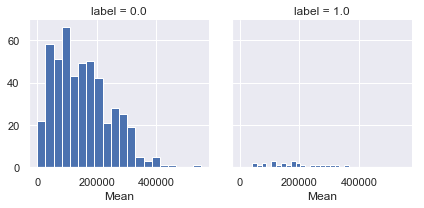

In [29]:
g = sns.FacetGrid(trainData, col='label')
g.map(plt.hist, 'Mean', bins=20)

In [30]:
ytrain=trainData['label']

In [31]:
X_train=trainData.drop('label',1)

# Data Scaling

In [32]:
sc_X = MinMaxScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(testData)

In [33]:
X_test_sc.shape

(468, 5)

In [34]:
X_train_sc.shape

(515, 5)

In [35]:
X_train_sc = np.reshape(X_train_sc, (X_train_sc.shape[0], X_train_sc.shape[1], 1))

In [36]:
X_test_sc=np.reshape(X_test_sc, (X_test_sc.shape[0], X_test_sc.shape[1], 1))

In [37]:
X_train_sc.shape

(515, 5, 1)

In [38]:
X_test_sc.shape

(468, 5, 1)

In [39]:
X_train_sc[0]

array([[0.01041237],
       [0.37751237],
       [0.89699719],
       [0.50529843],
       [0.13143037]])

In [40]:
X_train_sc.shape

(515, 5, 1)

In [41]:
ytrain.shape

(515,)

In [42]:
ytrain= np.asarray(ytrain)

## Build Model

here I used LSTM Model because our data has time series,On the other hand I see this Model did not train very well and that becuse the data not balanced and has a high bias 

In [43]:
model =tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape = (X_train_sc.shape[1], 1)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  #one output
model.compile(loss='binary_crossentropy',metrics=['accuracy'])


In [44]:
model.fit(X_train_sc, ytrain, epochs = 50,batch_size = 5)

Train on 515 samples
Epoch 1/50
515/515 [==============================] - 3s 6ms/sample - loss: 0.3670 - accuracy: 0.9417
Epoch 2/50
515/515 [==============================] - 1s 983us/sample - loss: 0.2044 - accuracy: 0.9515
Epoch 3/50
515/515 [==============================] - 1s 971us/sample - loss: 0.2004 - accuracy: 0.9515
Epoch 4/50
515/515 [==============================] - 1s 979us/sample - loss: 0.2014 - accuracy: 0.9515
Epoch 5/50
515/515 [==============================] - 0s 968us/sample - loss: 0.2012 - accuracy: 0.9515
Epoch 6/50
515/515 [==============================] - 0s 959us/sample - loss: 0.2006 - accuracy: 0.9515
Epoch 7/50
515/515 [==============================] - 0s 958us/sample - loss: 0.2011 - accuracy: 0.9515
Epoch 8/50
515/515 [==============================] - 0s 960us/sample - loss: 0.1976 - accuracy: 0.9515
Epoch 9/50
515/515 [==============================] - 0s 960us/sample - loss: 0.1987 - accuracy: 0.9515
Epoch 10/50
515/515 [========================

In [48]:
model.save('lstm_model.h5')

In [49]:

model = tf.keras.models.load_model('lstm_model.h5')
# make predictions
ypre = model.predict(X_test_sc, verbose=0)


In [50]:
ypre

array([[0.02797323],
       [0.03546816],
       [0.03555632],
       [0.04221943],
       [0.03513852],
       [0.03120089],
       [0.03133008],
       [0.03091034],
       [0.03077126],
       [0.04095697],
       [0.03491288],
       [0.03383341],
       [0.05394095],
       [0.04613864],
       [0.06250355],
       [0.03480232],
       [0.03124869],
       [0.03116173],
       [0.03098211],
       [0.04116374],
       [0.035164  ],
       [0.03296033],
       [0.03114432],
       [0.05219796],
       [0.03426352],
       [0.04881176],
       [0.0671865 ],
       [0.03786713],
       [0.03387094],
       [0.03731212],
       [0.04629597],
       [0.03394634],
       [0.03302661],
       [0.03923458],
       [0.03181124],
       [0.03967768],
       [0.03433898],
       [0.03138438],
       [0.0309329 ],
       [0.03069574],
       [0.03132769],
       [0.03115988],
       [0.03497833],
       [0.03402144],
       [0.04456091],
       [0.04082623],
       [0.04042953],
       [0.041

In [51]:
DateTest=df[['date']]

In [52]:
DateTest_sub=DateTest.iloc[515:,:]

In [53]:
DateTest_sub.shape,ypre.shape

((468, 1), (468, 1))

In [54]:
DateTest_sub=DateTest_sub.reset_index()

# Export Submission file

In [85]:
ypre =pd.DataFrame(ypre,columns=['probability'])

Task1_submission = pd.concat([DateTest_sub['date'],ypre],axis=1)
Task1_submission.to_csv('Task1_submission.csv',index=False)